In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


# Notebook to investigate the performance of spike interface in localizing neurons 

In [2]:
import MEArec as mr # what we will use to create a synthetic recording
import spikeinterface.full as si  # what we will use to sort the spikes

import warnings
from probeinterface.plotting import plot_probe
from matplotlib import cm
from probeinterface import read_prb

import time
import numpy as np

job_kwargs = {'n_jobs' : -1, 'chunk_memory' : '10M', 'verbose': True, 'progress_bar': True}

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).
/home/pierre/anaconda3/envs/si/lib/python3.9/site-packages/tridesclous/numba_tools.py:11: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(parallel=True)
/home/pierre/anaconda3/envs/si/lib/python3.9/site-packages/tridesclous/numba_tools.py:33: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numb

In [3]:
rec = mr.load_recordings('recordings.h5')
positions = np.hstack((rec.template_locations[:, 1:3], rec.template_locations[:, 0][:, np.newaxis]))

from spikeinterface.sortingcomponents.benchmark.benchmark_peak_localization import BenchmarkPeakLocalization, plot_comparison_positions
recording, gt_sorting = si.read_mearec('recordings.h5')
recording_f = si.bandpass_filter(recording)
recording_f = si.common_reference(recording_f)
recording_f = si.zscore(recording_f)

/home/pierre/github/spikeinterface/src/spikeinterface/sortingcomponents/clustering/sliding_nn.py:368: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(fastmath=True, cache=True)


In [4]:
benchmarks = []
waveforms = None
for method in ['center_of_mass', 'monopolar_triangulation', 'grid_convolution']:
    if method == 'center_of_mass':
        for feature in ['ptp', 'energy', 'peak_voltage']:
            title = f'CoM ({feature})'
            params = {'feature' : feature}
            bench = BenchmarkPeakLocalization(recording_f, gt_sorting, positions, job_kwargs=job_kwargs, title=title)
            if waveforms is not None:
                bench.waveforms = waveforms
            bench.run(method, params)
            waveforms = bench.waveforms
            benchmarks.append(bench)
    elif method == 'monopolar_triangulation':
        for feature in ['ptp', 'energy', 'peak_voltage']:
            title = f'Monopolar ({feature})'
            params = {'enforce_decrease': True, 'feature' : feature}
            bench = BenchmarkPeakLocalization(recording_f, gt_sorting, positions, job_kwargs=job_kwargs, title=title)
            if waveforms is not None:
                bench.waveforms = waveforms
            bench.run(method, params)
            waveforms = bench.waveforms
            benchmarks.append(bench)
    elif method == 'grid_convolution':
        title = 'Grid'
        params = {}
        bench = BenchmarkPeakLocalization(recording_f, gt_sorting, positions, job_kwargs=job_kwargs, title=title)
        if waveforms is not None:
            bench.waveforms = waveforms
        bench.run(method, params)
        waveforms = bench.waveforms
        benchmarks.append(bench)
    
    

extract waveforms shared_memory with n_jobs = 20 and chunk_size = 9765


extract waveforms shared_memory:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

peak_pipeline with n_jobs = 20 and chunk_size = 9765


peak_pipeline:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using grid_convolution with n_jobs = 20 and chunk_size = 9765


localize peaks using grid_convolution:   0%|          | 0/33 [00:00<?, ?it/s]

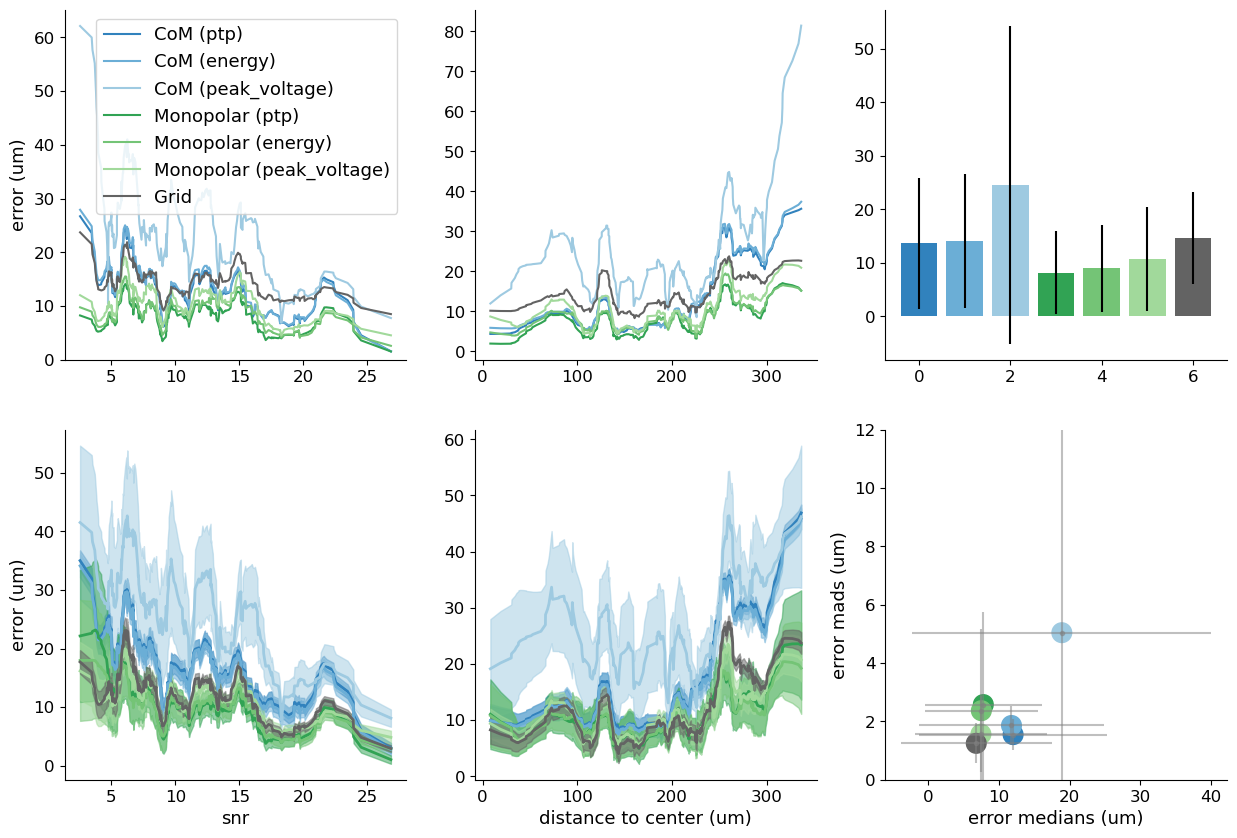

In [5]:
colors = {}

import matplotlib as mpl

cmap = mpl.cm.tab20c
norm = mpl.colors.Normalize(vmin=0, vmax=1)



for value, bench in zip([0,0.05,0.1,0.4,0.45,0.5,0.8], benchmarks):    
    colors[bench.title] = mpl.cm.ScalarMappable(norm=norm, cmap=cmap).to_rgba(value)
    
plot_comparison_positions(benchmarks, colors=colors)
import pylab as plt
plt.savefig('comparison.pdf')

In [5]:
from spikeinterface.sortingcomponents.benchmark.benchmark_peak_localization import BenchmarkPeakLocalization, plot_figure_1

In [ ]:
plot_figure_1(benchmarks[0])
import pylab as plt
plt.savefig('illustration.pdf')

ZScoreRecording: 256 channels - 1 segments - 32.0kHz - 10.000s
extract waveforms shared_memory with n_jobs = 12 and chunk_size = 9765


extract waveforms shared_memory:   0%|          | 0/33 [00:00<?, ?it/s]

In [38]:
from spikeinterface.sortingcomponents.benchmark.benchmark_peak_localization import BenchmarkPeakLocalization, plot_comparison_inferences

In [39]:
plot_comparison_inferences(benchmarks)
plt.tight_layout()
#plt.savefig('impact.pdf')

NameError: name 'benchmarks' is not defined

In [4]:
from spikeinterface.sortingcomponents.benchmark.benchmark_peak_localization import plot_comparison_precision

In [6]:
benchmarks_ms = {}
waveforms = None
for method in ['monopolar_triangulation', 'center_of_mass']:
    benchmarks_ms[method] = {}
    for t_range in [0.25, 0.5, 0.75, 1, 1.25, 1.5]:
        if method == 'monopolar_triangulation':
            title = f'Mononopolar [{t_range}ms]'
            params = {'enforce_decrease': True, 'ms_before' : t_range, 'ms_after' : t_range}
        else:
            params = {'ms_before' : t_range, 'ms_after' : t_range}
            title = f'CoM (ptp) [{t_range}ms]'
        bench = BenchmarkPeakLocalization(recording_f, gt_sorting, positions, job_kwargs=job_kwargs, title=title)
        if waveforms is not None:
            bench.waveforms = waveforms    
        bench.run(method, params)
        waveforms = bench.waveforms
        benchmarks_ms[method][t_range] = bench
    

Exception ignored in: <function BenchmarkPeakLocalization.__del__ at 0x7f1385ae3940>
Traceback (most recent call last):
  File "/home/pierre/github/spikeinterface/spikeinterface/sortingcomponents/benchmark/benchmark_peak_localization.py", line 39, in __del__
    shutil.rmtree(self.tmp_folder)
  File "/home/pierre/anaconda3/envs/circus/lib/python3.9/shutil.py", line 724, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/home/pierre/anaconda3/envs/circus/lib/python3.9/shutil.py", line 722, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: './JKJXQ741'


extract waveforms memmap with n_jobs = 12 and chunk_size = 9765


extract waveforms memmap:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/33 [00:00<?, ?it/s]

In [7]:
Anahita Basirat

extract waveforms memmap with n_jobs = 12 and chunk_size = 9765


extract waveforms memmap:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/33 [00:00<?, ?it/s]

In [8]:
recordings = {}
for cut_off in [100, 300, 500, 700, 900]:
    recordings[cut_off] = si.bandpass_filter(recording, freq_min=cut_off)
    recordings[cut_off] = si.common_reference(recordings[cut_off])
    recordings[cut_off] = si.zscore(recordings[cut_off])

In [9]:
benchmarks_cutoff = {}
for method in ['monopolar_triangulation', 'center_of_mass']:
    benchmarks_cutoff[method] = {}
    for cut_off in [100, 300, 500, 700, 900]:
        if method == 'monopolar_triangulation':
            title = f'Mononopolar [{cut_off}Hz]'
            params = {'enforce_decrease': True}
        else:
            title = f'CoM (ptp) [{cut_off}Hz]'
            params = {}

        bench = BenchmarkPeakLocalization(recordings[cut_off], gt_sorting, positions, job_kwargs=job_kwargs, title=title)
        bench.run(method, params)
        benchmarks_cutoff[method][cut_off] = bench

extract waveforms memmap with n_jobs = 12 and chunk_size = 9765


extract waveforms memmap:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms memmap with n_jobs = 12 and chunk_size = 9765


extract waveforms memmap:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms memmap with n_jobs = 12 and chunk_size = 9765


extract waveforms memmap:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms memmap with n_jobs = 12 and chunk_size = 9765


extract waveforms memmap:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms memmap with n_jobs = 12 and chunk_size = 9765


extract waveforms memmap:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms memmap with n_jobs = 12 and chunk_size = 9765


extract waveforms memmap:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms memmap with n_jobs = 12 and chunk_size = 9765


extract waveforms memmap:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms memmap with n_jobs = 12 and chunk_size = 9765


extract waveforms memmap:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms memmap with n_jobs = 12 and chunk_size = 9765


extract waveforms memmap:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms memmap with n_jobs = 12 and chunk_size = 9765


extract waveforms memmap:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks with n_jobs = 12 and chunk_size = 9765


localize peaks:   0%|          | 0/33 [00:00<?, ?it/s]

In [10]:
benchmarks_ms

{'monopolar_triangulation': {0.25: <spikeinterface.sortingcomponents.benchmark.benchmark_peak_localization.BenchmarkPeakLocalization at 0x7f1385e56af0>,
  0.5: <spikeinterface.sortingcomponents.benchmark.benchmark_peak_localization.BenchmarkPeakLocalization at 0x7f1385b28b50>,
  0.75: <spikeinterface.sortingcomponents.benchmark.benchmark_peak_localization.BenchmarkPeakLocalization at 0x7f132f7a0a90>,
  1: <spikeinterface.sortingcomponents.benchmark.benchmark_peak_localization.BenchmarkPeakLocalization at 0x7f132f7c37c0>,
  1.25: <spikeinterface.sortingcomponents.benchmark.benchmark_peak_localization.BenchmarkPeakLocalization at 0x7f1385b34a60>,
  1.5: <spikeinterface.sortingcomponents.benchmark.benchmark_peak_localization.BenchmarkPeakLocalization at 0x7f1386b60a00>},
 'center_of_mass': {0.25: <spikeinterface.sortingcomponents.benchmark.benchmark_peak_localization.BenchmarkPeakLocalization at 0x7f1385f39fa0>,
  0.5: <spikeinterface.sortingcomponents.benchmark.benchmark_peak_localizatio

In [16]:
from spikeinterface.sortingcomponents.benchmark.benchmark_tools import BenchmarkBase, _simpleaxis 
import pylab as plt
import matplotlib


def plot_comparison_precision(benchmarks, cmap='winter'):

    import pylab as plt
    fig, axes = plt.subplots(ncols=2, nrows=len(benchmarks), figsize=(15, 10), squeeze=False)
    
    for icount, benchmark in enumerate(benchmarks):
    
        vrange = np.array(list(benchmark.keys()))
        v_min = np.min(vrange)
        v_max = np.max(vrange)
        
        my_cmap = plt.get_cmap(cmap)
        cNorm  = matplotlib.colors.Normalize(vmin=v_min, vmax=v_max)
        scalarMap = plt.cm.ScalarMappable(norm=cNorm, cmap=my_cmap)
        
        for key, bench in benchmark.items():

            spikes = bench.spike_positions[0]
            units = bench.waveforms.sorting.unit_ids
            all_x = np.concatenate([spikes[unit_id]['x'] for unit_id in units])
            all_y = np.concatenate([spikes[unit_id]['y'] for unit_id in units])
            try:
                all_z = np.concatenate([spikes[unit_id]['z'] for unit_id in units])
            except Exception:
                all_z = np.zeros(len(all_x))
                
            gt_positions = bench.gt_positions
            real_x = np.concatenate([gt_positions[c, 0]*np.ones(len(spikes[i]['x'])) for c, i in enumerate(units)])
            real_y = np.concatenate([gt_positions[c, 1]*np.ones(len(spikes[i]['y'])) for c, i in enumerate(units)])
            try:
                real_z = np.concatenate([gt_positions[c, 2]*np.ones(len(spikes[i]['z'])) for c, i in enumerate(units)])
            except Exception:
                real_z = np.zeros(len(real_x))
                
            dx = np.abs(all_x - real_x)
            dy = np.abs(all_y - real_y)
            dz = np.abs(all_z - real_z)
            ax = axes[icount, 0]
            
            colorVal = scalarMap.to_rgba(key)
            
            ax.errorbar(np.arange(3), [dx.mean(), dy.mean(), dz.mean()], 
                        yerr=[dx.std(), dy.std(), dz.std()], label=bench.title, c=colorVal)
        ax.legend()
        ax.set_ylabel('error (um)')
        ax.set_xticks(np.arange(3), ['x', 'y', 'z'])
        _simpleaxis(ax)

        x_means = []
        x_stds = []
        for bench in benchmark.values():
            x_means += [np.mean(bench.medians_over_templates)]
            x_stds += [np.std(bench.medians_over_templates)]

        #ax.set_yticks([])
        #ax.set_ylim(ymin, ymax)

        ax = axes[icount, 1]
        _simpleaxis(ax)

        y_means = []
        y_stds = []
        colors = []
        for key, bench in benchmark.items():
            y_means += [np.mean(bench.mads_over_templates)]
            y_stds += [np.std(bench.mads_over_templates)]
            colors += [scalarMap.to_rgba(key)]

        ax.errorbar(x_means, y_means, xerr=x_stds, yerr=y_stds, fmt='.', c='0.5', alpha=0.5)
        ax.scatter(x_means, y_means, c=colors, s=200)

        ax.set_ylabel('error variances (um)')
        ax.set_xlabel('error means (um)')
      #ax.set_yticks([]
        ymin, ymax = ax.get_ylim()
        #ax.set_ylim(0, 25)
        ax.legend()

In [35]:
from spikeinterface.sortingcomponents.benchmark.benchmark_tools import BenchmarkBase, _simpleaxis 
import pylab as plt
import matplotlib

def plot_comparison_precision_2(benchmarks, mycolors=['C3', 'C0']):

    import pylab as plt
    fig, axes = plt.subplots(nrows=2, ncols=len(benchmarks) + 1, figsize=(15, 7), squeeze=False)
    
    for jcount, method in enumerate(benchmarks[0].keys()):
    
        for icount, benchmark in enumerate(benchmarks):

            bench = benchmark[method]
            
            #vrange = np.array(list(bench.keys()))
            #v_min = np.min(vrange)
            #v_max = np.max(vrange)

            #my_cmap = plt.get_cmap(cmaps[jcount])
            #cNorm  = matplotlib.colors.Normalize(vmin=v_min, vmax=v_max)
            #scalarMap = plt.cm.ScalarMappable(norm=cNorm, cmap=my_cmap)

            if icount == len(benchmarks) - 1:
                b = bench[100]

                spikes = b.spike_positions[0]
                units = b.waveforms.sorting.unit_ids
                all_x = np.concatenate([spikes[unit_id]['x'] for unit_id in units])
                all_y = np.concatenate([spikes[unit_id]['y'] for unit_id in units])
                try:
                    all_z = np.concatenate([spikes[unit_id]['z'] for unit_id in units])
                except Exception:
                    all_z = np.nan * np.zeros(len(all_x))

                gt_positions = b.gt_positions
                real_x = np.concatenate([gt_positions[c, 0]*np.ones(len(spikes[i]['x'])) for c, i in enumerate(units)])
                real_y = np.concatenate([gt_positions[c, 1]*np.ones(len(spikes[i]['y'])) for c, i in enumerate(units)])
                try:
                    real_z = np.concatenate([gt_positions[c, 2]*np.ones(len(spikes[i]['z'])) for c, i in enumerate(units)])
                except Exception:
                    real_z = np.nan * np.zeros(len(real_x))

                dx = np.abs(all_x - real_x)
                dy = np.abs(all_y - real_y)
                dz = np.abs(all_z - real_z)
                ax = axes[jcount, icount+1]

                ax.errorbar(np.arange(3), [dx.mean(), dy.mean(), dz.mean()], 
                                yerr=[dx.std(), dy.std(), dz.std()], c=mycolors[jcount])
                _simpleaxis(ax)
                
                ax.set_ylabel('error (um)')
                if jcount == 1:
                    ax.set_xticks(np.arange(3), ['x', 'y', 'z'])
                else:
                    ax.set_xticks([])
            
            ax = axes[jcount, icount]
            
            _simpleaxis(ax)

            x_means = []
            y_means = []
            y_stds = []
            colors = []
            labels = []
                
            for key, b in bench.items():
                x_means += [np.mean(b.medians_over_templates)]
                #x_stds += [np.std(b.medians_over_templates)]
                y_means += [np.mean(b.mads_over_templates)]
                #y_stds += [np.std(b.mads_over_templates)]
                #colors += [scalarMap.to_rgba(key)]
                label = b.title.replace('Mononopolar', '')
                label = label.replace('CoM (ptp)', '')
                labels += [label]
                #ax.scatter(x_means, y_means, c=colors, label=label, s=200, edgecolor='k')
                ax.bar(np.arange(len(x_means)), x_means, yerr=y_means, color=mycolors[jcount])
                
            #ax.errorbar(x_means, y_means, xerr=x_stds, yerr=y_stds, fmt='.', c='0.5', alpha=0.5)
                
    
            #ax.legend(loc='lower right')
            
            if icount == 0:
                ax.set_ylabel('error medians (um)')
            else:
                ax.set_yticks([])
            
            if jcount == 0:
                #ax.set_xlim(7, 9)
                ax.set_xticks([])
            else:
                ax.set_xticks(np.arange(len(labels)), labels, rotation=45)
                #ax.set_xlim(12, 14)
            
            #ymin, ymax = ax.get_ylim()
            
            #if jcount == 0:
            #    ax.set_ylim(0, 2.6)
            #else:
            #    ax.set_ylim(0, 2)
                #ax.set_xlim(5, 20)
            
            #ax.set_title(method)

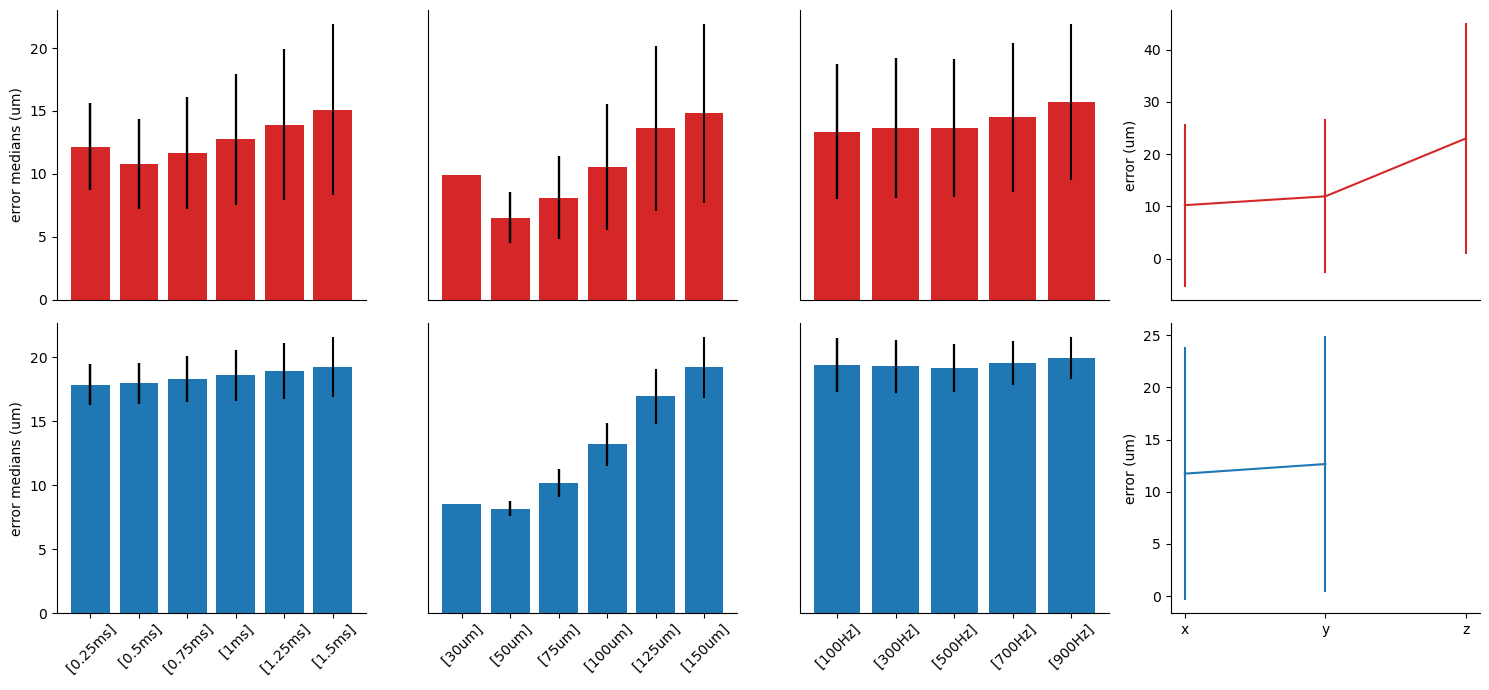

In [36]:
plot_comparison_precision_2([benchmarks_ms, benchmarks_radius, benchmarks_cutoff])
plt.tight_layout()
plt.savefig('influence.pdf')